In [1]:
import torch
import torchvision
from torchvision.transforms import v2
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image


import vcpi_util

In [2]:
data_dir = 'dataset'
img_size = 32

BATCH_SIZE = 8

In [3]:
transform = transforms.Compose([
    v2.ToImage(),
    v2.Resize((img_size, img_size)), 
    v2.ToDtype(torch.float32, scale=True)
])

In [4]:
train_set: torchvision.datasets.ImageFolder = torchvision.datasets.ImageFolder(root=f"{data_dir}/train", transform = transform)
train_loader: torch.utils.data.DataLoader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)

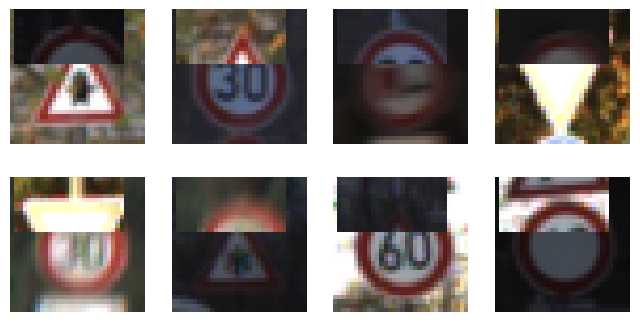

<Figure size 640x480 with 0 Axes>

In [5]:
# imgs, labels = next(iter(train_loader))
# vcpi_util.show_images(2, 4, imgs, labels, train_set.classes)

cutmix = v2.CutMix(num_classes=len(train_set.classes))
mixup = v2.MixUp(num_classes=len(train_set.classes))
cutmix_or_mixup = v2.RandomChoice([cutmix, mixup], [0.5, 0.5])


imgs, labels = next(iter(train_loader))
imgs2, labels2 = cutmix(imgs, labels)
vcpi_util.show_images(2, 4, imgs2, labels, train_set.classes)

In [6]:
transform2 = transforms.Compose([
    v2.ToImage(),
    # v2.RandomRotation(50),
    v2.Resize((img_size, img_size)), 
    # v2.RandomErasing(0.5, (0.1,0.1)),
    v2.ColorJitter(),
    v2.ToDtype(torch.float32, scale=True)
])

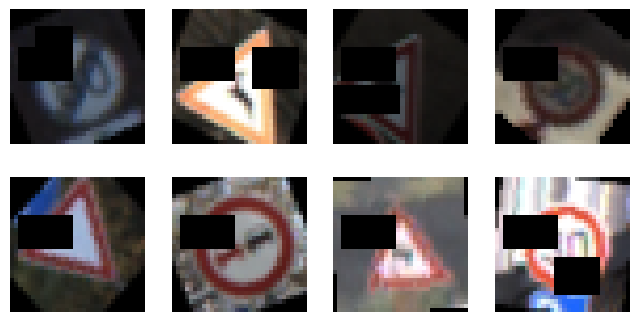

<Figure size 640x480 with 0 Axes>

In [16]:
train_loader2 = torch.utils.data.DataLoader(
    torch.utils.data.ConcatDataset([
        # torchvision.datasets.ImageFolder(root=f"{data_dir}/train", transform=transform), # random erasing
        torchvision.datasets.ImageFolder(root=f"{data_dir}/train", transform=transform2) # nada
    ]), batch_size = BATCH_SIZE, shuffle=True
)

imgs, labels = next(iter(train_loader2))
imgs = transform2(imgs)
vcpi_util.show_images(2, 4, imgs, labels, train_set.classes)